In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

# URL for the Boston Housing dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# Download the dataset
response = requests.get(url)
data = response.text

# Define column names
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# Load the dataset into a DataFrame
df = pd.read_csv(StringIO(data), delim_whitespace=True, names=columns)


/tmp/ipykernel_147959/594132521.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, names=columns)


In [2]:
# Check for missing values
print("Initial data NaNs:")
print(df.isna().sum())

# Define features and target
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Define preprocessing steps
numeric_features = X.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Add a constant to the model (intercept)
X_preprocessed = sm.add_constant(X_preprocessed)

# Check for NaNs in the preprocessed data
print("Preprocessed data NaNs:")
print(np.isnan(X_preprocessed).sum())


Initial data NaNs:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Preprocessed data NaNs:
0


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=0)

# Build the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the model summary
print(results.summary())

# Predict on the test set
y_pred = results.predict(X_test)

# Evaluate the model
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error on test set: {mse}')


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          9.64e-117
Time:                        06:02:44   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4804      0.224    100.452      0.0

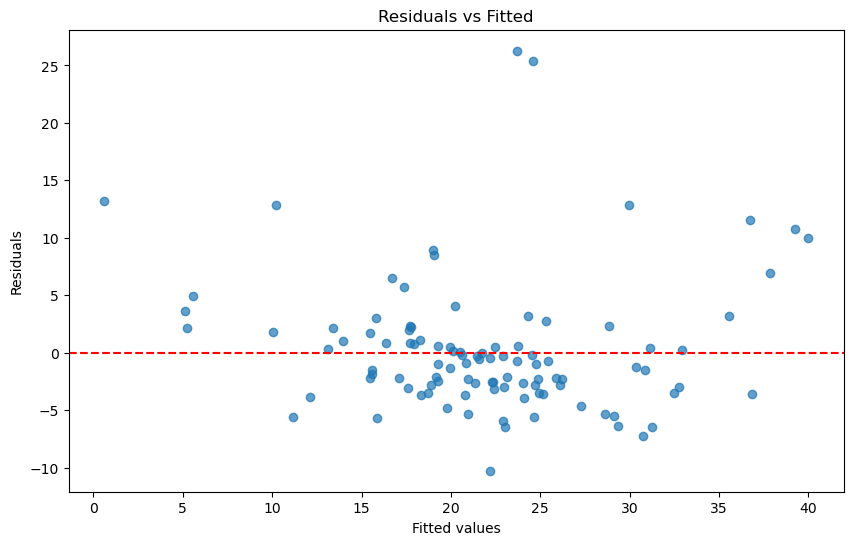

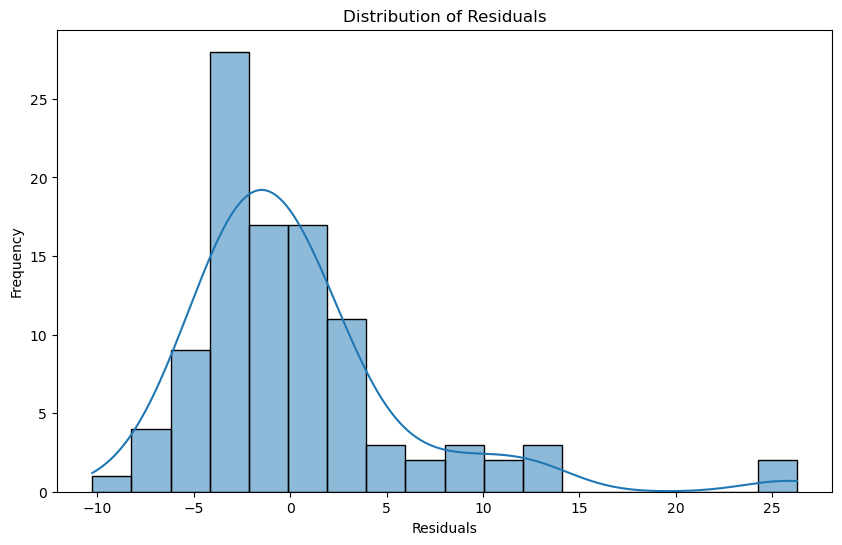

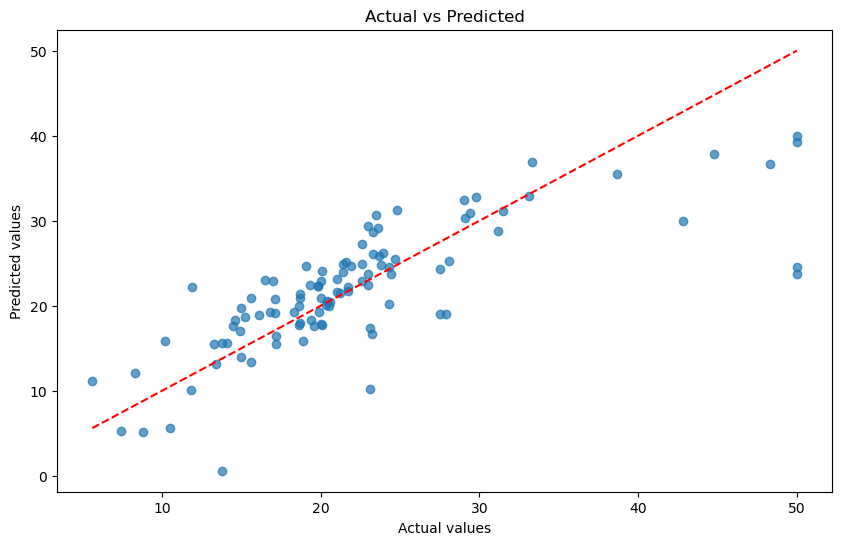

In [4]:
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()
